# 기술 통계
- 이 데이터에 있는 환자들의 기본 특성은 어떤가?
- 뇌졸중 환자 vs 비뇌졸중 환자 간의 차이가 눈에 띄는가?

# 연관성 / 위험요인
- 어떤 요인들이 뇌졸중과 통계적으로 관련이 있는가?
- 연령, 고혈압, 심장질환, 흡연 등이 stroke 위험을 얼마나 올리는가?

# 변수 정리
- gender
    - 0 = male, 1 = female, 2 = other
    - 명목형 변수
- age
    - 연속형 변수
    - 수치
- hypertension
    - 0 = no, 1 = yes
    - 이진 변수
- heart_disease
    - 0 = no, 1 = yes
    - 이진 변수
- ever_married
    - 0 = no, 1 = yes
    - 이진 변수
- work_type
    - 0 = private, 1 = self-employed, 2 = govt_job, 3 = children, 4 = never_work
    - 명목형 변수
- Residence_type
    - 0 = Urban, 1 = Rural
    - 이진 변수
- avg_glucose_level
    - 연속형 변수
    - 수치
- bmi
    - 연속형 변수
    - 수치
    - 일부 N/A → 중앙값으로 대체 완료
        - 97 같은 extreme 값은 유의미하다고 판단 → 남겨둠
- smoking_status
    - 0 = Unknown, 1 = never_smoked, 2 = smokes, 3 = formerly_smoked
- stroke
    - 0 = no, 1 = yes
    - 타깃 변수

# 기술 통계
## 연속형 변수
- age, avg_glucose_level, bmi
    - 샘플 수 확인
    - 평균, 표준편차 확인
    - 중앙값, IQR 확인
    - 최소, 최대 확인
    - 히스토그램 확인
    - density polt 확인
    - 박스 플롯 확인

## 범주형 변수
- gender, gypertension, heart_disease, ever_married, work_type, Residence_type, smoking_status, stroke
    - 빈도수 + 비율(%) 확인
    - 바 플롯 확인 (분포)

In [1]:
# 데이터 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 주피터노트북에서 그래프 바로 보이게 하는 설정 (노트북일 때만 필요)
%matplotlib inline

# stroke 데이터 불러오기
df = pd.read_csv("stroke.csv")

# 연속형 / 범주형 변수 리스트 정의
num_cols = ["age", "avg_glucose_level", "bmi"]
cat_cols = [
    "gender",
    "hypertension",
    "heart_disease",
    "ever_married",
    "work_type",
    "Residence_type",
    "smoking_status",
    "stroke"
]


In [2]:
# 연속형 변수 기술 통계 테이블 만들기
# count, mean, std, min, 25%, 50%, 75%, max 자동 계산
desc = df[num_cols].describe().T  # 행: 변수, 열: 통계치

# IQR(사분위 범위) 계산해서 추가
desc["IQR"] = desc["75%"] - desc["25%"]

# 보기 좋게 컬럼 순서 정리
desc = desc[["count", "mean", "std", "50%", "25%", "75%", "IQR", "min", "max"]]

print("=== 연속형 변수 기술 통계 ===")
print(desc)

=== 연속형 변수 기술 통계 ===
                    count        mean        std     50%     25%     75%  \
age                5110.0   43.226614  22.612647  45.000  25.000   61.00   
avg_glucose_level  5110.0  106.147677  45.283560  91.885  77.245  114.09   
bmi                5110.0   28.862035   7.699562  28.100  23.800   32.80   

                      IQR    min     max  
age                36.000   0.08   82.00  
avg_glucose_level  36.845  55.12  271.74  
bmi                 9.000  10.30   97.60  


In [3]:
# 각 변수별로 조금 더 친절하게 출력하고 싶을 때
for col in num_cols:
    series = df[col].dropna()  # 결측값 제거 후 통계 계산
    
    n = series.shape[0]
    mean = series.mean()
    std = series.std()
    median = series.median()
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    vmin = series.min()
    vmax = series.max()
    
    print(f"\n[변수: {col}]")
    print(f"  샘플 수 (n)      : {n}")
    print(f"  평균 (mean)      : {mean:.2f}")
    print(f"  표준편차 (std)   : {std:.2f}")
    print(f"  중앙값 (median)  : {median:.2f}")
    print(f"  1사분위 (Q1)     : {q1:.2f}")
    print(f"  3사분위 (Q3)     : {q3:.2f}")
    print(f"  IQR(Q3-Q1)       : {iqr:.2f}")
    print(f"  최소값 (min)     : {vmin:.2f}")
    print(f"  최대값 (max)     : {vmax:.2f}")



[변수: age]
  샘플 수 (n)      : 5110
  평균 (mean)      : 43.23
  표준편차 (std)   : 22.61
  중앙값 (median)  : 45.00
  1사분위 (Q1)     : 25.00
  3사분위 (Q3)     : 61.00
  IQR(Q3-Q1)       : 36.00
  최소값 (min)     : 0.08
  최대값 (max)     : 82.00

[변수: avg_glucose_level]
  샘플 수 (n)      : 5110
  평균 (mean)      : 106.15
  표준편차 (std)   : 45.28
  중앙값 (median)  : 91.88
  1사분위 (Q1)     : 77.25
  3사분위 (Q3)     : 114.09
  IQR(Q3-Q1)       : 36.84
  최소값 (min)     : 55.12
  최대값 (max)     : 271.74

[변수: bmi]
  샘플 수 (n)      : 5110
  평균 (mean)      : 28.86
  표준편차 (std)   : 7.70
  중앙값 (median)  : 28.10
  1사분위 (Q1)     : 23.80
  3사분위 (Q3)     : 32.80
  IQR(Q3-Q1)       : 9.00
  최소값 (min)     : 10.30
  최대값 (max)     : 97.60


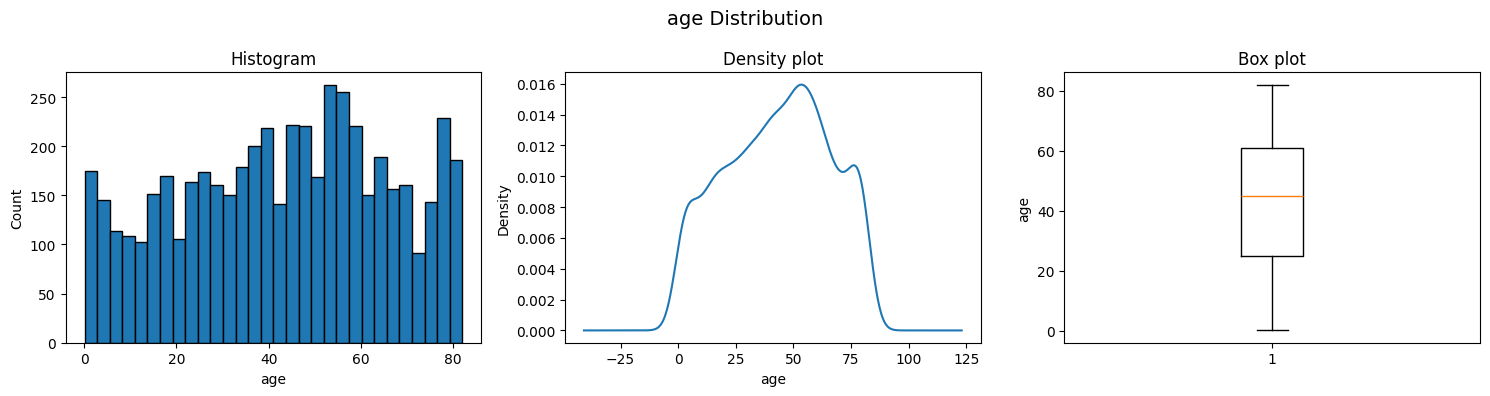

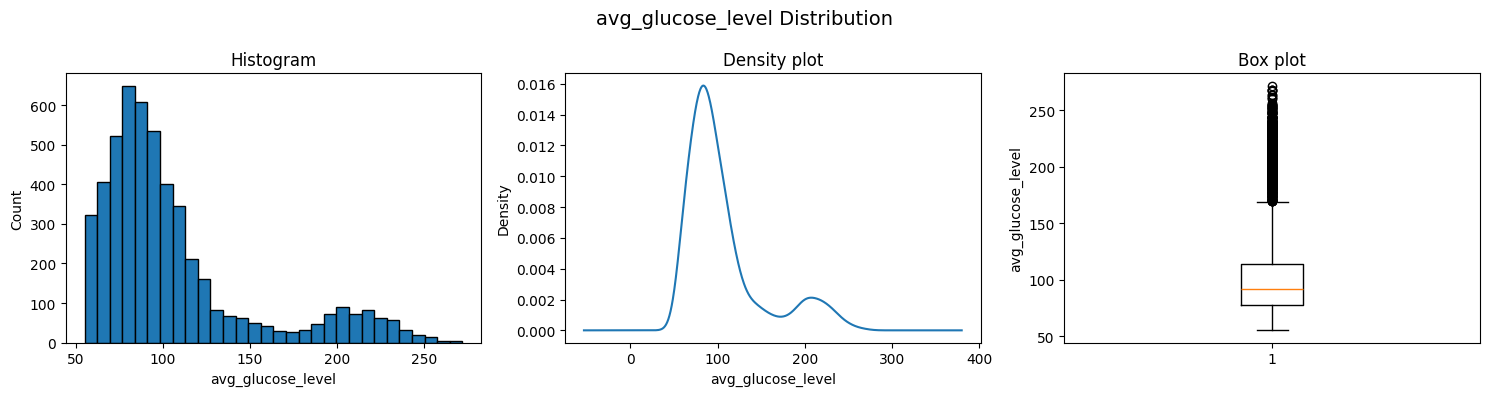

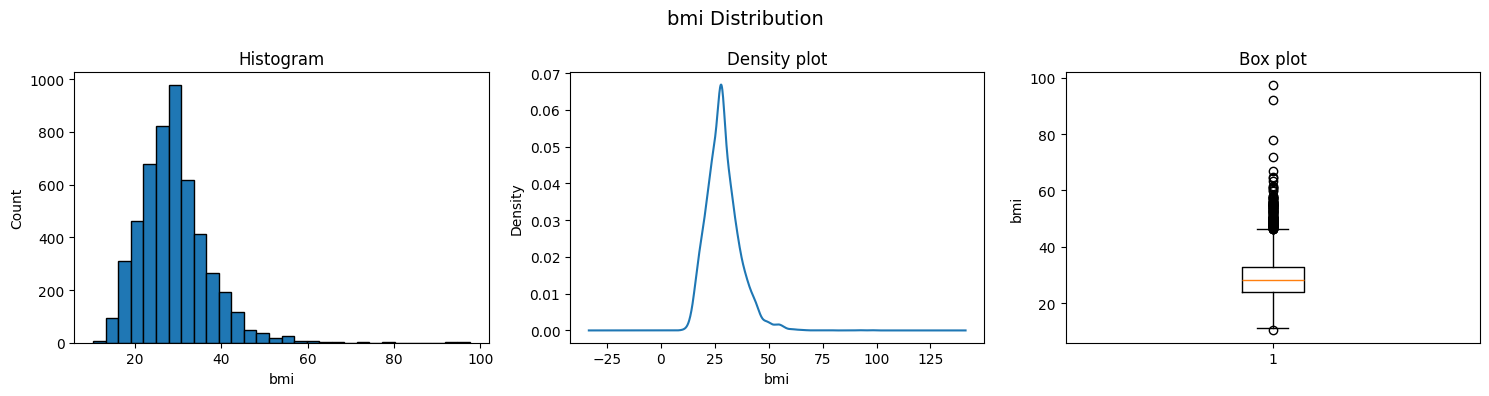

In [5]:
# 연속형 변수 시각화
for col in num_cols:
    data = df[col].dropna()  # 결측 제거
    
    # 한 변수당 1행 3열: 히스토그램, 밀도그래프, 박스플롯
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    fig.suptitle(f"{col} Distribution", fontsize=14)
    
    # 1) 히스토그램
    axes[0].hist(data, bins=30, edgecolor="black")
    axes[0].set_title("Histogram")
    axes[0].set_xlabel(col)
    axes[0].set_ylabel("Count")
    
    # 2) density plot (커널 밀도 추정)
    #    hist 대신 선으로 분포의 모양을 보는 그래프
    data.plot(kind="density", ax=axes[1])
    axes[1].set_title("Density plot")
    axes[1].set_xlabel(col)
    
    # 3) box plot (박스 플롯)
    axes[2].boxplot(data, vert=True)
    axes[2].set_title("Box plot")
    axes[2].set_ylabel(col)
    
    plt.tight_layout()
    plt.show()

- age
    - 통계적 비교시 t-test 사용이 충분히 가능
    - 정규성 근사 분포
- avg_glucose_level
    - 비정규 → Mann-Whitney U test가 적절
    - 고혈당과 stroke 연관성 있을 가능성 높음
        - 후속 분석 필요
- BMI
    - 비정규 → Mann-Whitney U test가 적절
    - outlier를 그대로 두고 분석해도 됨
        - but, 모델에 넣을 때는 scaling 고려
    - Extreme BMI는 Stroke과의 관계가 있을 수도
        - 추후 scatter이나 logistic에서 확인 필요

In [ ]:
# 범주형 변수 기술 통계 (빈도 + 비율)
for col in cat_cols:
    print(f"\n=== 범주형 변수: {col} ===")
    
    # value_counts로 빈도수 구하기
    counts = df[col].value_counts(dropna=False)  # 결측도 함께 보고 싶으면 dropna=False
    ratios = df[col].value_counts(normalize=True, dropna=False) * 100  # 비율(%)
    
    # 하나의 데이터프레임으로 합치기
    freq_table = pd.DataFrame({
        "count": counts,
        "percent": ratios.round(2)
    })
    
    print(freq_table)


=== 범주형 변수: gender ===
        count  percent
gender                
1        2994    58.59
0        2115    41.39
3           1     0.02

=== 범주형 변수: hypertension ===
              count  percent
hypertension                
0              4612    90.25
1               498     9.75

=== 범주형 변수: heart_disease ===
               count  percent
heart_disease                
0               4834     94.6
1                276      5.4

=== 범주형 변수: ever_married ===
              count  percent
ever_married                
1              3353    65.62
0              1757    34.38

=== 범주형 변수: work_type ===
           count  percent
work_type                
0           2925    57.24
1            819    16.03
3            687    13.44
2            657    12.86
4             22     0.43

=== 범주형 변수: Residence_type ===
                count  percent
Residence_type                
0                2596     50.8
1                2514     49.2

=== 범주형 변수: smoking_status ===
                count

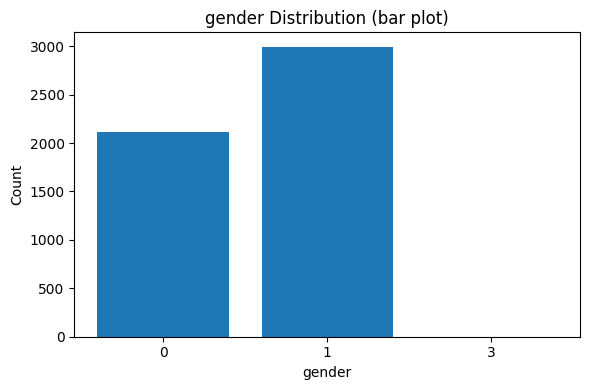

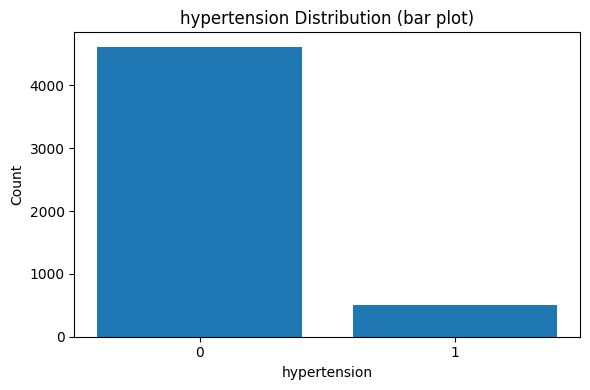

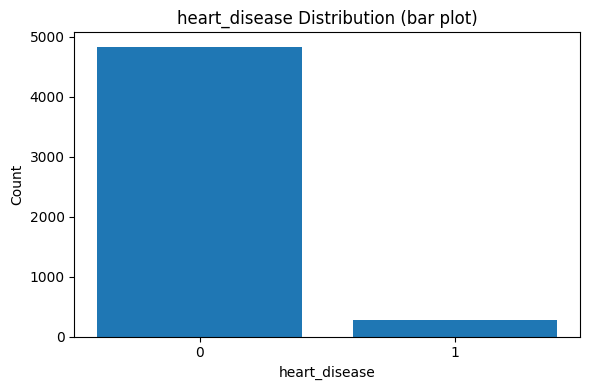

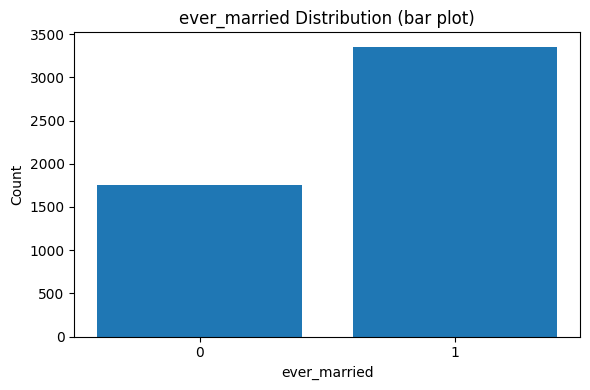

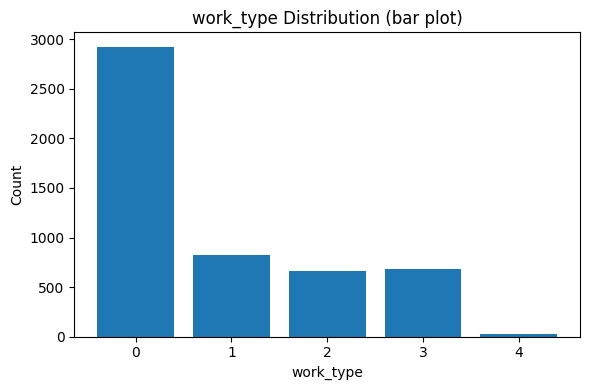

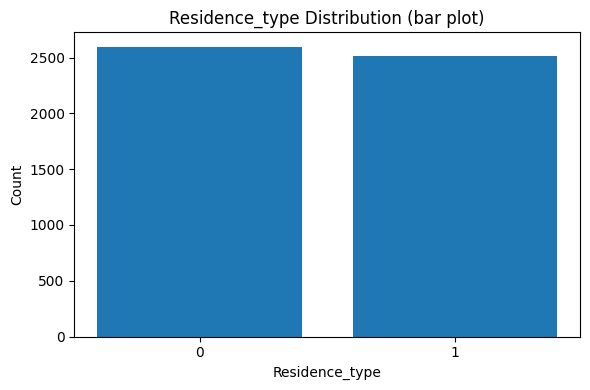

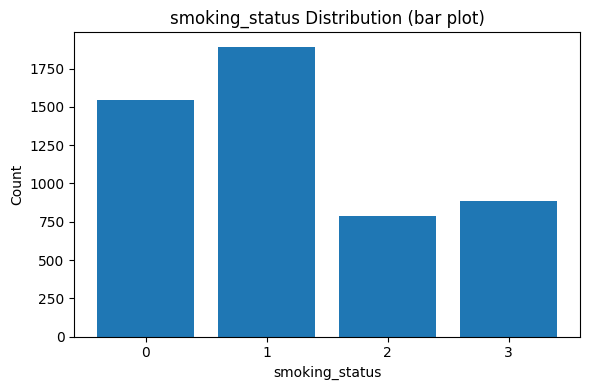

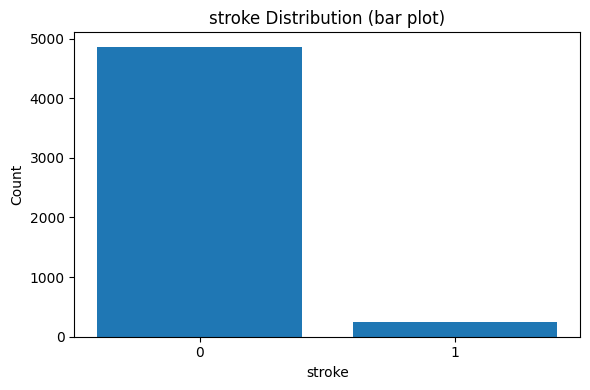

In [9]:
# 범주형 변수 바 플롯
for col in cat_cols:
    counts = df[col].value_counts().sort_index()  # 코드값 기준으로 정렬
    
    plt.figure(figsize=(6, 4))
    plt.bar(counts.index.astype(str), counts.values)
    plt.title(f"{col} Distribution (bar plot)")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


- stroke 
    - 강한 클래스 불균형
        - ML 모델에서 반드시 처리 필요
        - class_weight
        - SMOTE
        - undersampling
        - AUC 기반 평가

# Stroke vs Non-stroke 그룹 비교
## 그룹 나누기
- Stroke = 0 비뇌졸중 그룹
- Stroke = 1 뇌졸중 그룹
## 연속형 변수 비교
- 정규성 확인
    - Shapiro-Wilk test, QQ plot 등으로 확인
        - 거의 정규 & 분산 크게 다르지 않으면
            - 독립표본 t-test
        - 비정규/꼬리 두꺼움/극단닶 많음 이라면
            - Mann-Whitney U test (Wilcoxon rank-sum)
    - age
        - 평균/중앙값을 stroke vs non-stroke 그룹에서 비교
        - 뇌졸중 그룸의 나이가 유의하게 더 높은가?
    - avg_glucose_level
        - 뇌졸중 그룹에서 혈당이 전반적으로 더 높은지
    - bmi
        - bmi 차이가 있는지
## 범주형 변수 비교
- 교차표 만들기
- 검정 방법 선택
    - 기대도수가 충분히 크면 (대부분 셀에서 기대값 >= 5) 
        - 카이제곱 검정
    - 표가 너무 작거나 rar category가 많으면
        - Fisher's exact test
    - 뇌졸중이 있는 환자에서 고혈압 비율이 유의하게 높은가?
    - 심장질환 유무와 뇌졸중 사이에 통계적으로 유의한 연관성이 있는가?
    - 흡연 상태와 뇌졸중은 관련이 있는가?
    - 도시 vs 농촌 거주에 따른 차이가 있는가?
    - work_type 별 stroke 비율이 다른가?

In [10]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
df = pd.read_csv("stroke.csv")

# 그룹 나누기
stroke0 = df[df["stroke"] == 0]
stroke1 = df[df["stroke"] == 1]

num_cols = ["age", "avg_glucose_level", "bmi"]
cat_cols = [
    "gender", "hypertension", "heart_disease",
    "ever_married", "work_type", "Residence_type",
    "smoking_status"
]



==================== [연속형 변수: age] ====================
[정규성 검정: Shapiro-Wilk]
 - stroke=0  p-value = 1.284432216282588e-08
 - stroke=1  p-value = 3.173724865197424e-13


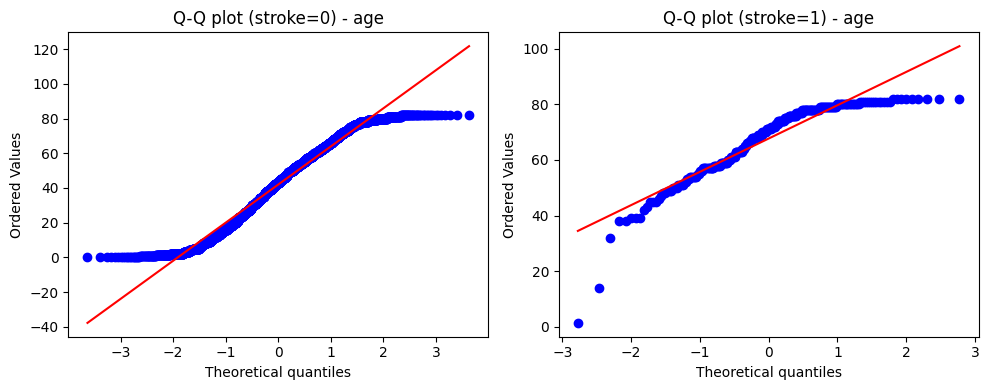

>> 비정규 분포 또는 극단값 존재 → Mann-Whitney U test 수행
검정 통계량 = 200263.5000, p-value = 3.726634665900011e-71

[기술 통계 비교]
stroke=0  mean=41.971544949598844, median=43.0, n=4861
stroke=1  mean=67.72819277108434, median=71.0, n=249

==================== [연속형 변수: avg_glucose_level] ====================
[정규성 검정: Shapiro-Wilk]
 - stroke=0  p-value = 1.1462717137683932e-24
 - stroke=1  p-value = 1.2319525411457356e-13


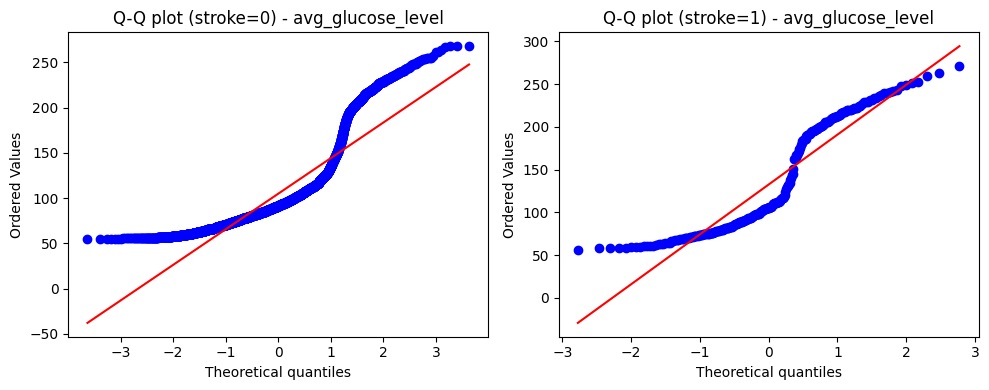

>> 비정규 분포 또는 극단값 존재 → Mann-Whitney U test 수행
검정 통계량 = 471239.0000, p-value = 3.6403672710893236e-09

[기술 통계 비교]
stroke=0  mean=104.79551326887471, median=91.47, n=4861
stroke=1  mean=132.54473895582328, median=105.22, n=249

==================== [연속형 변수: bmi] ====================
[정규성 검정: Shapiro-Wilk]
 - stroke=0  p-value = 8.493416957809756e-12
 - stroke=1  p-value = 6.427205143660826e-10


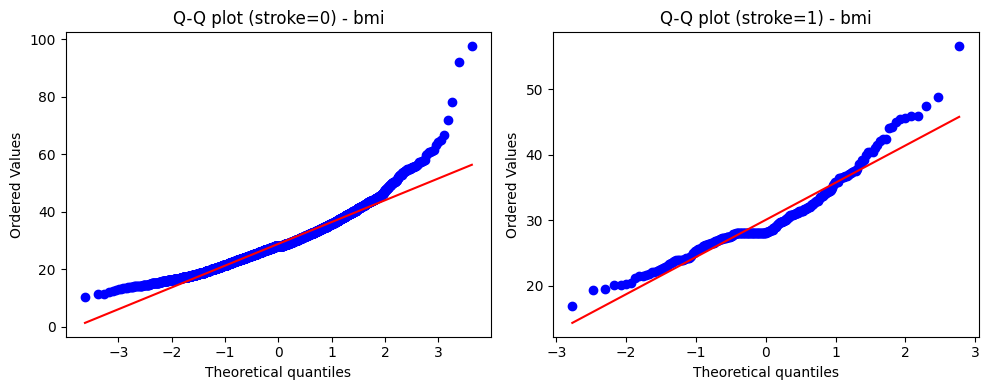

>> 비정규 분포 또는 극단값 존재 → Mann-Whitney U test 수행
검정 통계량 = 522642.5000, p-value = 0.00027690391864726487

[기술 통계 비교]
stroke=0  mean=28.79911540835219, median=28.1, n=4861
stroke=1  mean=30.09036144578313, median=28.1, n=249


In [19]:
# 연속형 변수: 정규성 확인 + 적절한 검정 적용
from scipy.stats import shapiro

for col in num_cols:
    print(f"\n==================== [연속형 변수: {col}] ====================")

    # 각 그룹 데이터 추출
    g0 = stroke0[col].dropna()
    g1 = stroke1[col].dropna()

    # 정규성 검사 (Shapiro-Wilk)
    w0, p0 = shapiro(g0.sample(500) if len(g0) > 500 else g0)  # 500개 초과 시 샘플링(계산 안정성)
    w1, p1 = shapiro(g1.sample(500) if len(g1) > 500 else g1)

    print(f"[정규성 검정: Shapiro-Wilk]")
    print(f" - stroke=0  p-value = {p0}")
    print(f" - stroke=1  p-value = {p1}")

    # Q-Q plot 시각화
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    stats.probplot(g0, dist="norm", plot=ax[0])
    ax[0].set_title(f"Q-Q plot (stroke=0) - {col}")
    stats.probplot(g1, dist="norm", plot=ax[1])
    ax[1].set_title(f"Q-Q plot (stroke=1) - {col}")
    plt.tight_layout()
    plt.show()

    # 정규 분포 가정 여부 판단
    normal0 = p0 > 0.05
    normal1 = p1 > 0.05

    # 두 그룹 모두 정규라고 가정될 때는 t-test, 아니면 Mann-Whitney
    if normal0 and normal1:
        print(">> 두 그룹 모두 정규 → 독립표본 t-test 수행")
        t_stat, p_val = stats.ttest_ind(g0, g1, equal_var=False)
    else:
        print(">> 비정규 분포 또는 극단값 존재 → Mann-Whitney U test 수행")
        t_stat, p_val = stats.mannwhitneyu(g0, g1, alternative="two-sided")

    print(f"검정 통계량 = {t_stat:.4f}, p-value = {p_val}")

    # 두 그룹의 기술 통계 비교
    print(f"\n[기술 통계 비교]")
    print(f"stroke=0  mean={g0.mean()}, median={g0.median()}, n={len(g0)}")
    print(f"stroke=1  mean={g1.mean()}, median={g1.median()}, n={len(g1)}")


1) **Age**

    📌 정규성
    - stroke=0, stroke=1 모두 Shapiro-Wilk p < 0.05 → 정규성 위반
    - Q-Q plot에서도 아래·위 꼬리가 상당히 휘어있음
        - 특히 stroke=1(뇌졸중 그룹)은 예외값이 커서 정규분포와 거리가 큼.

    📌 평균/중앙값 비교
    - stroke=0: mean=41.97, median=43
    - stroke=1: mean=67.73, median=71

    👉 뇌졸중 그룹의 나이가 압도적으로 높음.

    📌 Mann-Whitney U test 결과
    - p-value = 3.7e-71 → 통계적으로 매우 유의함

    📌 해석
    - 나이는 뇌졸중 발생과 가장 강한 단변량 요인
    - 실제 임상에서도 stroke 위험은 나이 증가와 매우 밀접
        - 이 dataset에서도 그대로 반영됨

    📌 다음 단계에서 꼭 고려할 점
    - ✔ 연령은 로지스틱 회귀에서 반드시 넣어야 하는 핵심 조정 변수(confounder)
    - ✔ ML 모델에서도 매우 중요한 feature로 학습될 것
    - ✔ age와 다른 변수 간 다중공선성은 낮을 것으로 보임 → 긍정적

2) **avg_glucose_level**

    📌 정규성
    - 두 그룹 모두 p < 0.05 → 비정규
    - Q-Q plot에서 꼬리가 크게 솟아있고 heavy tail 존재

    📌 기술통계
    - stroke=0: mean=104.8, median=91.47
    - stroke=1: mean=132.5, median=105.22

        → 혈당이 stroke 그룹에서 훨씬 높음

    📌 Mann-Whitney 결과
    - p-value = 3.64e-09 → 유의함

    📌 해석
    - 고혈당(당대사 장애)이 stroke와 관련 있을 가능성이 큼
    - 실제로도 혈당 상승은 혈관 손상·동맥경화를 촉진하는 요인

    📌 다음 단계
    - ✔ 혈당을 모델에 포함하면 성능 향상 가능
    - ✔ 단변량 OR 계산 시 의미 있는 OR이 나올 가능성 큼
    - ✔ glucose와 BMI 상관 여부도 후속 확인해볼 수 있음

3) **BMI (체질량지수)**

    📌 정규성
    - 두 그룹 모두 비정규
    - Q-Q plot에서 outlier가 많아 꼬리가 큼

    📌 기술통계
    - stroke=0: mean=28.79, median=28.1
    - stroke=1: mean=30.09, median=28.1

    👉 평균은 유의하게 다르지만 중앙값은 동일

    👉 즉 약간의 BMI 상승 경향이 있으나 아주 강한 차이는 아님

    📌 Mann-Whitney 결과
    - p-value = 0.00027 → 통계적으로 유의함

    📌 해석
    - BMI는 뇌졸중에 약간 영향을 줄 수 있으나
    - age·hypertension·glucose에 비해 영향력은 작은 편
    - outlier 많지만 dataset 특성상 가능한 값임

    📌 다음 단계
    - ✔ 로지스틱 회귀 변수로 포함 가능
    - ✔ StandardScaler 반드시 필요
    - ✔ BMI의 extreme(>50)이 stroke=1에 더 몰려 있는지 후속 탐색 가능

In [22]:
# 범주형 변수: 교차표 + 카이제곱 or Fisher
from scipy.stats import chi2_contingency, fisher_exact

for col in cat_cols:
    print(f"\n==================== [범주형 변수: {col}] ====================")

    # 교차표 만들기
    ctab = pd.crosstab(df[col], df["stroke"])
    print("\n[교차표]")
    print(ctab)

    # 기대도수 계산
    chi2, p, dof, expected = chi2_contingency(ctab)
    expected_df = pd.DataFrame(expected, index=ctab.index, columns=ctab.columns)

    print("\n[기대도수]")
    print(expected_df)

    # 기대도수 5 미만이 있는지 확인
    if (expected < 5).sum() > 0:
        print("\n>> 기대도수 < 5 존재 → Fisher's Exact Test 수행")
        if ctab.shape == (2, 2):  
            # 2x2일 때만 Fisher 가능
            _, p_val = fisher_exact(ctab)
        else:
            print("⚠ Fisher는 2x2 표에서만 가능. 카이제곱 사용.")
            _, p_val, _, _ = chi2_contingency(ctab)
    else:
        print("\n>> 기대도수 충분 → 카이제곱 검정 수행")
        _, p_val, _, _ = chi2_contingency(ctab)

    print(f"p-value = {p_val}")



==================== [범주형 변수: gender] ====================

[교차표]
stroke     0    1
gender           
0       2007  108
1       2853  141
3          1    0

[기대도수]
stroke            0           1
gender                         
0       2011.940313  103.059687
1       2848.108415  145.891585
3          0.951272    0.048728

>> 기대도수 < 5 존재 → Fisher's Exact Test 수행
⚠ Fisher는 2x2 표에서만 가능. 카이제곱 사용.
p-value = 0.7895490538408245

==================== [범주형 변수: hypertension] ====================

[교차표]
stroke           0    1
hypertension           
0             4429  183
1              432   66

[기대도수]
stroke                  0           1
hypertension                         
0             4387.266536  224.733464
1              473.733464   24.266536

>> 기대도수 충분 → 카이제곱 검정 수행
p-value = 1.661621901511823e-19

==================== [범주형 변수: heart_disease] ====================

[교차표]
stroke            0    1
heart_disease           
0              4632  202
1               229   47

[기대도수]
strok

1) Gender
- p = 0.789
    
    → 유의하지 않음.

📌 해석
- 성별은 stroke 발생과 통계적으로 유의한 차이가 없음
- 실제로도 성별 자체는 큰 영향이 없으며 연령·흡연·질병이 더 영향 큼

2) Hypertension (고혈압)
- p ≈ 1.66e-19 → 강하게 유의함

📌 교차표
- stroke=0 중 고혈압=1: 432명
- stroke=1 중 고혈압=1: 66명 (비율 매우 큼)

📌 해석
- 고혈압은 stroke의 가장 강력한 위험요인 중 하나
- 단변량 OR 계산 시 매우 높은 OR(3~5배 이상) 나올 가능성이 큼

3) Heart disease
- p ≈ 2.08e-21 → 매우 유의함

📌 해석
- 심장질환 역시 stroke 위험 증가와 연관
- 특히 심방세동(AFib)이 있으면 뇌졸중 위험 급증
- dataset이 심장질환을 “1/0”으로만 표현한 단순 지표임에도
    - 이렇게 유의하다는 것은 매우 강한 신호

4) Ever_married
- p ≈ 1.64e-14 → 유의함

📌 해석
- married 그룹은 보통 연령이 높은 그룹
- 즉 결혼 여부 자체가 stroke를 일으키는 것이 아니라
- Age로 인한 confounding 가능성이 큼
    - 따라서 로지스틱 회귀에서 age 보정이 반드시 필요

5) Work_type
- p ≈ 5.39e-10 → 유의함

📌 해석
- children(=미성년자), private, self-employed 등 직업 유형에 차이 존재
- 하지만 이것도 대부분 age 효과가 반영된 것
    - (예: children = 나이 어린 집단)

    - ✔ 중요한 통찰
        - ➡ work_type이 stroke와 직접 관계가 있는 것처럼 보일 수 있으나 대부분 “Age structure difference”로 설명됨 
        - 따라서 다변량 회귀에서 age 보정 후 의미가 사라질 가능성도 있음.

6) Residence_type (도시 vs 농촌)
- p = 0.298 → 유의하지 않음

📌 해석
- 도시/농촌 거주 여부는 stroke와 실질적인 연관 없음
- 실제 임상에서도 residence는 큰 요인이 아님

7) Smoking_status
- p ≈ 2.08e-06 → 유의함

📌 해석
- 흡연 상태는 stroke와 상관 있음
- 특히 formerly_smoked 비율이 더 높은 것으로 보임
- unknown이 30%라는 점이 조금 까다로운 변수이지만
    - 그래도 유의미한 신호가 존재

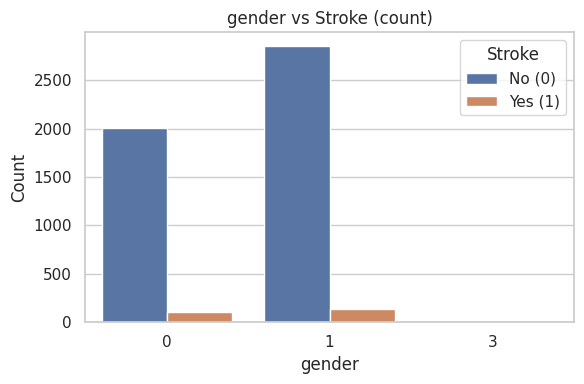

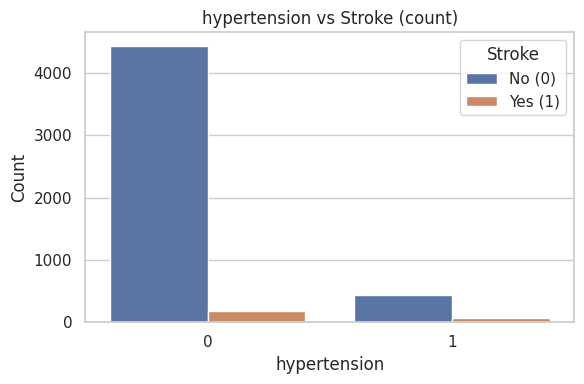

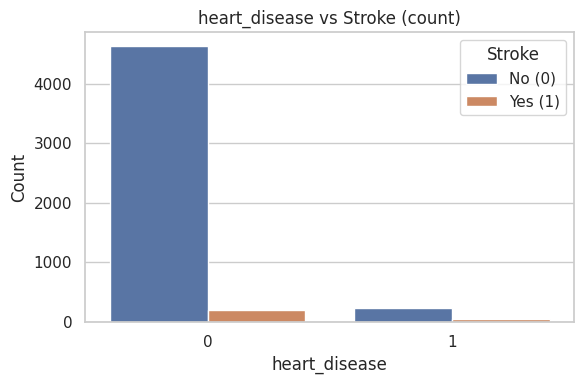

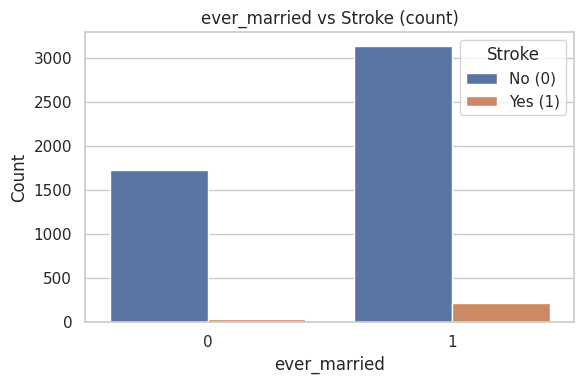

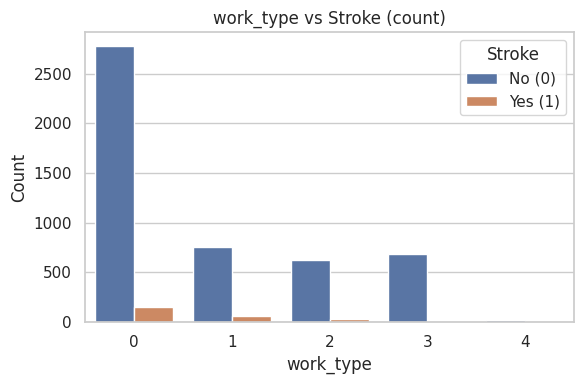

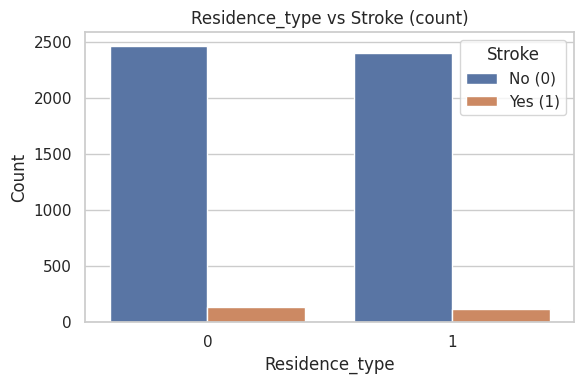

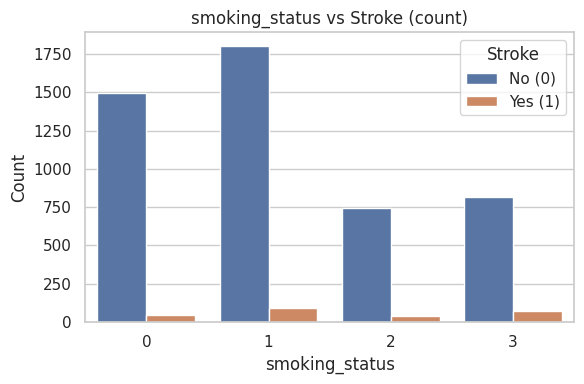

<Figure size 600x400 with 0 Axes>

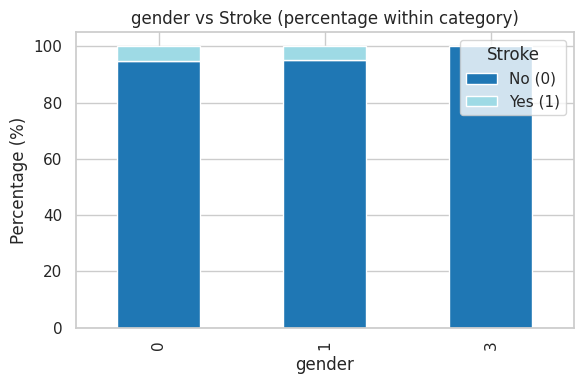

<Figure size 600x400 with 0 Axes>

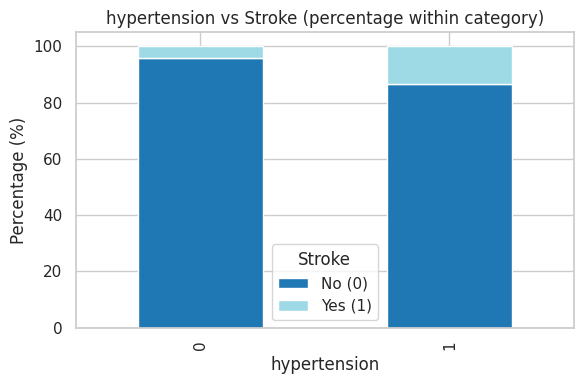

<Figure size 600x400 with 0 Axes>

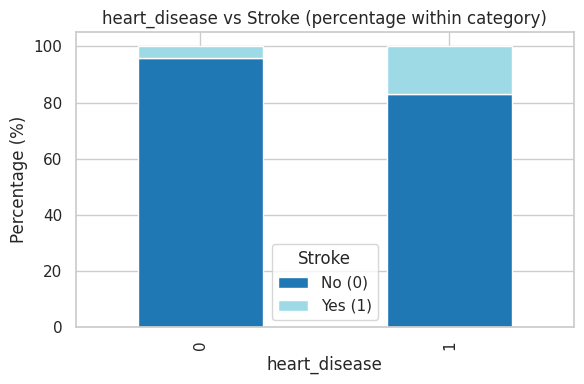

<Figure size 600x400 with 0 Axes>

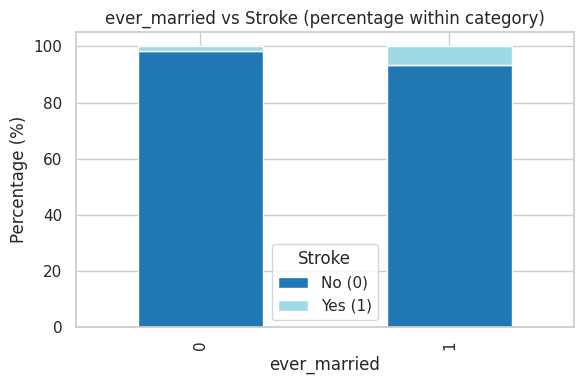

<Figure size 600x400 with 0 Axes>

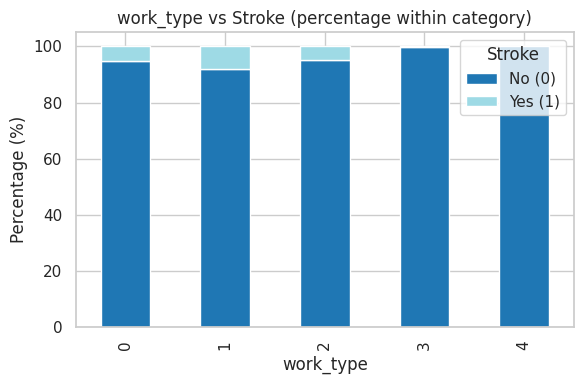

<Figure size 600x400 with 0 Axes>

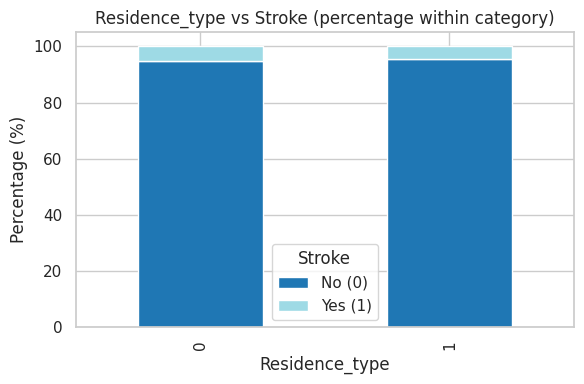

<Figure size 600x400 with 0 Axes>

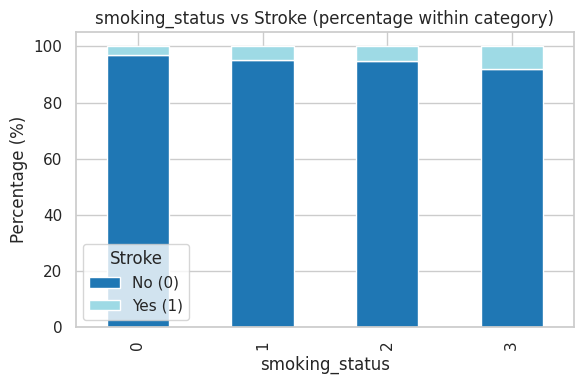

# 상관관계 & 공변량 구조 파악
## 수치형 변수 상관관계
- age, avg_glucose_level, bmi
    - 나이가 많을 수록 혈당이 높아지는 경향이 있는가?
    - BMI와 혈당이 어느 정도 같이 움직이는지?
    - 다중공선성 확인 (r > 0.8)
## 범주형 변수 간 관계

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr, chi2_contingency

df = pd.read_csv("stroke.csv")

num_cols = ["age", "avg_glucose_level", "bmi"]
cat_cols = [
    "gender", "hypertension", "heart_disease",
    "ever_married", "work_type", "Residence_type",
    "smoking_status"
]


=== Pearson Correlation ===
                        age  avg_glucose_level       bmi
age                1.000000           0.238171  0.324296
avg_glucose_level  0.238171           1.000000  0.166876
bmi                0.324296           0.166876  1.000000

=== Spearman Correlation ===
                        age  avg_glucose_level       bmi
age                1.000000           0.145168  0.362859
avg_glucose_level  0.145168           1.000000  0.111914
bmi                0.362859           0.111914  1.000000


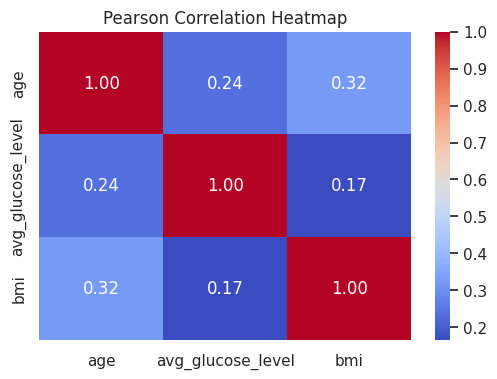

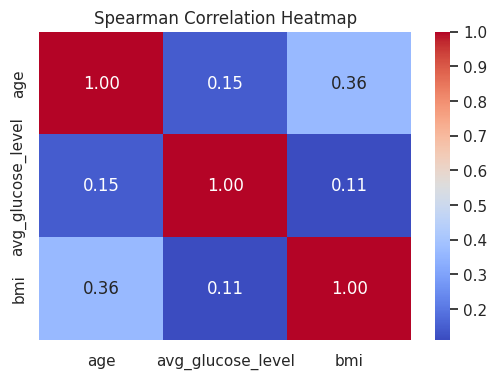


=== 다중공선성 의심 (|r| > 0.8) 체크 ===
age - avg_glucose_level: r = 0.24 (문제 없음)
age - bmi: r = 0.32 (문제 없음)
avg_glucose_level - age: r = 0.24 (문제 없음)
avg_glucose_level - bmi: r = 0.17 (문제 없음)
bmi - age: r = 0.32 (문제 없음)
bmi - avg_glucose_level: r = 0.17 (문제 없음)


In [33]:
# 수치형 변수 상관관계

# Pearson 상관계수
pearson_corr = df[num_cols].corr(method='pearson')

# Spearman 상관계수 (비정규형에 더 강함)
spearman_corr = df[num_cols].corr(method='spearman')

print("=== Pearson Correlation ===")
print(pearson_corr)

print("\n=== Spearman Correlation ===")
print(spearman_corr)

# heatmap 시각화
plt.figure(figsize=(6,4))
sns.heatmap(pearson_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Pearson Correlation Heatmap")
plt.show()

plt.figure(figsize=(6,4))
sns.heatmap(spearman_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Spearman Correlation Heatmap")
plt.show()

# 다중공선성 위험도 체크 (r > 0.8)
print("\n=== 다중공선성 의심 (|r| > 0.8) 체크 ===")
for c1 in num_cols:
    for c2 in num_cols:
        if c1 != c2:
            r = pearson_corr.loc[c1, c2]
            if abs(r) > 0.8:
                print(f"⚠ Multicollinearity 위험: {c1} - {c2}, r = {r:.2f}")
            else:
                print(f"{c1} - {c2}: r = {r:.2f} (문제 없음)")


In [34]:
# Cramér's V 계산 함수
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


=== Cramér’s V Matrix (범주형 상관) ===
                  gender  hypertension  heart_disease  ever_married  \
gender          1.000000      0.008949       0.083444      0.029870   
hypertension    0.008949      0.998887       0.105937      0.162965   
heart_disease   0.083444      0.105937       0.998085      0.112880   
ever_married    0.029870      0.162965       0.112880      0.999566   
work_type       0.058593      0.160250       0.114262      0.566589   
Residence_type  0.000000      0.000000       0.000000      0.000000   
smoking_status  0.070888      0.140514       0.090296      0.341564   

                work_type  Residence_type  smoking_status  
gender           0.058593        0.000000        0.070888  
hypertension     0.160250        0.000000        0.140514  
heart_disease    0.114262        0.000000        0.090296  
ever_married     0.566589        0.000000        0.341564  
work_type        1.000000        0.011301        0.299806  
Residence_type   0.011301        0.9

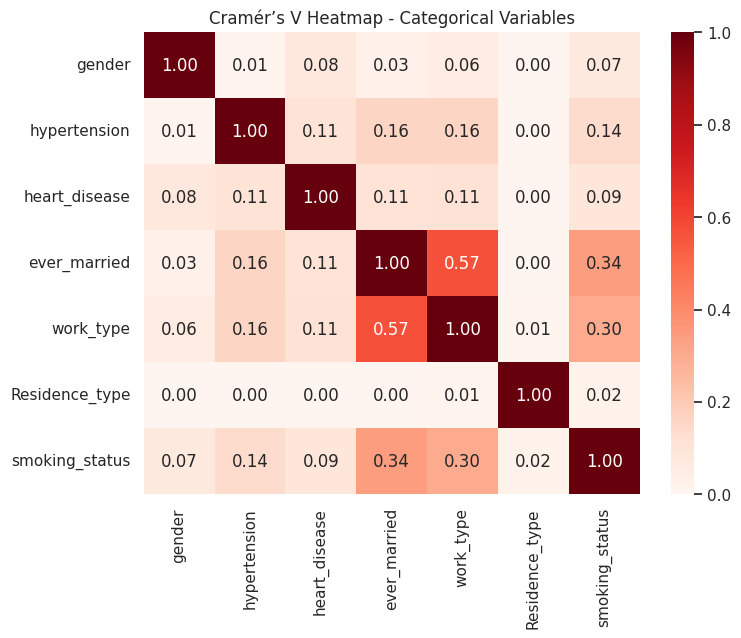

In [35]:
# 범주형 변수 간 상관 (Cramér’s V matrix)

cramers_matrix = pd.DataFrame(np.zeros((len(cat_cols), len(cat_cols))),
                              index=cat_cols, columns=cat_cols)

for c1 in cat_cols:
    for c2 in cat_cols:
        table = pd.crosstab(df[c1], df[c2])
        v = cramers_v(table)
        cramers_matrix.loc[c1, c2] = v

print("=== Cramér’s V Matrix (범주형 상관) ===")
print(cramers_matrix)

plt.figure(figsize=(8,6))
sns.heatmap(cramers_matrix, annot=True, cmap="Reds", fmt=".2f")
plt.title("Cramér’s V Heatmap - Categorical Variables")
plt.show()


# 간단한 단변량 로지스틱
- 단변량 로지스틱 회귀
    - 각 변수 하나만 쓰고 stroke를 종속변수로 두기
    - OR (odd ratio)와 95% CI, p-value 보기
    - 각 변수와 stroke 간의 crude (보정 안된) 연관성 보고
        - 다음 단계에서 multivariable logistic regression으로 넘어가서 공변량을 보정

In [37]:
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 28.2 MB/s  0:00:00eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [statsmodels] [statsmodels]


In [38]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# 분석 대상 변수들
numeric_vars = ["age", "avg_glucose_level", "bmi"]
categorical_vars = ["gender", "hypertension", "heart_disease", "ever_married",
                    "work_type", "Residence_type", "smoking_status"]

# 타겟 변수
y = df["stroke"]

# 단변량 로지스틱 결과 저장 리스트
results = []

def run_univariate_logistic(var):
    """
    단변량 로지스틱 회귀를 실행하는 함수
    var: 독립변수 이름
    """
    X = df[[var]].copy()

    # 범주형 변수 → 더미 변수 변환 (첫 카테고리 제거)
    if X[var].dtype != 'float64' and X[var].dtype != 'int64':
        X = pd.get_dummies(X, columns=[var], drop_first=True)
    else:
        # 숫자형은 그대로
        pass

    # 상수항 추가
    X = sm.add_constant(X)

    # 모델 적합
    model = sm.Logit(y, X)
    result = model.fit(disp=0)

    # 회귀계수
    coef = result.params
    se = result.bse

    # OR 및 95% CI 계산
    OR = np.exp(coef)
    CI_lower = np.exp(coef - 1.96 * se)
    CI_upper = np.exp(coef + 1.96 * se)

    # p-value
    p_values = result.pvalues

    return OR, CI_lower, CI_upper, p_values


# 실제 실행
for var in numeric_vars + categorical_vars:
    OR, CI_lower, CI_upper, p_values = run_univariate_logistic(var)

    # 결과 표기: 단일 predictor에서는 intercept 제외한 값만 사용
    for term in OR.index:
        if term == "const":  # 절편 제외
            continue
        results.append({
            "variable": var + " | " + term,
            "OR": OR[term],
            "CI_lower": CI_lower[term],
            "CI_upper": CI_upper[term],
            "p_value": p_values[term]
        })

# 결과 DataFrame
univariate_results = pd.DataFrame(results)
univariate_results


,variable,OR,CI_lower,CI_upper,p_value
0,age | age,1.077590,1.067243,1.088037,4.748253e-52
1,avg_glucose_level | avg_glucose_level,1.010238,1.008009,1.012471,1.588144e-19
2,bmi | bmi,1.020272,1.004855,1.035926,9.782722e-03
3,gender | gender,0.916889,0.709413,1.185043,5.073899e-01
4,hypertension | hypertension,3.697556,2.743990,4.982496,8.448422e-18
5,heart_disease | heart_disease,4.706299,3.336321,6.638826,1.101612e-18
6,ever_married | ever_married,4.184158,2.828277,6.190050,7.884577e-13
7,work_type | work_type,0.753988,0.658825,0.862896,4.092255e-05
8,Residence_type | Residence_type,0.865907,0.670623,1.118058,2.695153e-01
9,smoking_status | smoking_status,1.362730,1.213099,1.530818,1.835191e-07
